say hello
debug >>>>>>>>
<class 'pandas.core.frame.DataFrame'>
              ts_code    open    high   close     low      volume
date                                                             
2019-07-31  000001.SZ    1.00    1.00    1.00    1.00   634723.50
2019-08-01  000001.SZ    1.00    1.00    1.00    1.00   969926.50
2019-08-02  000001.SZ    1.00    1.00    1.00    1.00   527981.25
2019-08-05  000001.SZ   13.60   13.64   13.35   13.27   893082.38
2019-08-06  000001.SZ   13.10   13.46   13.37   13.03   882499.12
2019-08-07  000001.SZ   13.49   13.64   13.54   13.37   793038.94
2019-08-08  000001.SZ   13.90   14.50   14.38   13.85  2330715.00
2019-08-09  000001.SZ   14.55   14.85   14.52   14.43  2060575.25
2019-08-12  000001.SZ   14.61   15.12   15.12   14.60  2733425.50
2019-08-13  000001.SZ   15.00   15.08   14.89   14.74  1293736.50
2019-08-14  000001.SZ   15.14   15.22   14.97   14.80  1360546.50
2019-08-15  000001.SZ   14.64   14.96   14.94   14.60   897376.25
2019-08-16  0

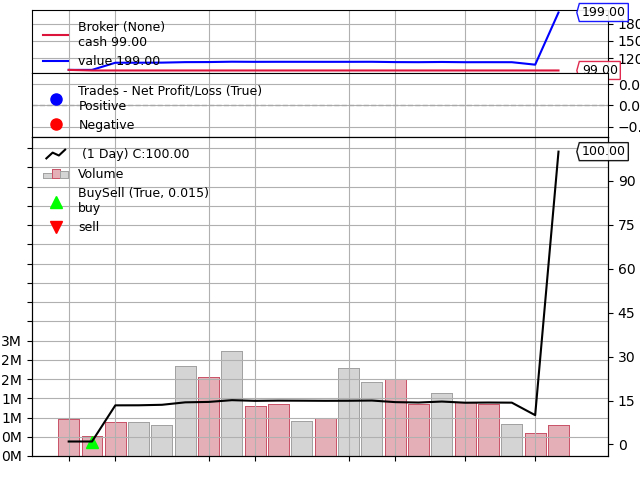

[[<Figure size 640x480 with 4 Axes>]]

In [5]:
# 从未来导入绝对导入，除法，打印功能，unicode_literals
from __future__ import (absolute_import, division, print_function, unicode_literals)
import backtrader as bt
import pandas as pd
from datetime import datetime
from colorama import Fore, Back, Style
import sys
from pprint import pprint
from indicators.indicator_goodday import *

# import method from sibling
# module
sys.path.append("..")
from tools.debuger import *

 
class TestStrategy(bt.Strategy):
    #  策略参数
    params = (
        ('maperiod', 15),
        ('defaultSize',1),
        ('printlog', True),
    )


    def log(self, txt, dt=None):
        ''' 记录功能'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        
        hello()
        # 引用到数据的close Line
        self.dataclose = self.datas[0].close
        print( "debug >>>>>>>>"  )
 
        # print( self.dataclose  )
        # debug(  self.datas[0])
        debug(  self.datas[0])
        print( type(self.datas[0]._dataname) )
        # pd.set_option('display.max_rows', None)
        # print(  self.datas[0]._dataname )
        printtable( self.datas[0]._dataname )
        print( "debug <<<<<<<<<<<<<<<<<    ")

        
        # 跟踪订单
        self.order = None
        
        # self.sma = bt.indicators.SimpleMovingAverage(
        #     self.datas[0], period=self.params.maperiod)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # 订单提交和成交当前不做处理
            return
        
        pprint(order)
        # self.log('OPERATION PROFIT, GROSS  NET %.2f' %
        #          ( order.pnlcomm))    

        # 检查订单是否成交
        # 注意，如果现金不够的话，订单会被拒接
        if order.status in [order.Completed]:
            if order.isbuy():
                print(Fore.RED + '>>>>>>>>>>')
                self.log('>>>>>>>>>> 买入被执行 买入价格, %.2f' % order.executed.price)
                print('当前可用资金', self.broker.getcash())
                print('当前总资产', self.broker.getvalue())
                print('当前持仓量', self.broker.getposition(self.data).size)
                print('当前持仓成本', self.broker.getposition(self.data).price)
                print(Fore.RED + '<<<<<<<<<<<<<')
                print(Style.RESET_ALL)

                
                
            elif order.issell():
                self.log('卖出被执行,卖出价格, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            print('订单取消 Order Canceled/Margin/Rejected' , order.status)
            if  order.status in [order.Canceled]:
                print('订单取消 Order Canceled' , order.status)
            if  order.status in [order.Margin]:
                print('订单取消 Order Margin' , order.status)
            if  order.status in [order.Rejected]:
                print('订单取消 Order Rejected' , order.status)    
                
            

        # 记录没有挂起的订单
        self.order = None

    def next(self):
        curdate = self.datas[0].datetime.date(0)
        # print("SMA",curdate, self.sma[0]) ;
        # 也可以直接获取持仓
        # print('当前持仓量', self.getposition(self.data).size)
        # print('当前持仓成本', self.getposition(self.data).price)
        #记录close的价格
        # self.log('Close, %.2f' % self.dataclose[0])

        # 检查是否有挂起的订单，如果有的话，不能再发起一个订单
        if self.order:
            return

        # 检查是否在市场（有持仓）
        if not self.position:
            
             curdate = self.datas[0].datetime.date(0)
            #  print('当前日期, %s' % curdate)
        
             if curdate == datetime.strptime('2019-08-01', '%Y-%m-%d').date():
                 print("good day")
                 # 可以买的最大数量????????????  
                 self.order = self.buy( size=self.params.defaultSize   )

            # 不在，那么连续3天价格下跌就买点
            # if self.dataclose[0] < self.dataclose[-1]:
            #         # 当前价格比上一次低

            #         if self.dataclose[-1] < self.dataclose[-2]:
            #             # 上一次的价格比上上次低
            #             # 买入!!! 
            #             self.log('买入创建, %.2f' % self.dataclose[0])

            #             # Keep track of the created order to avoid a 2nd order
            #             self.order = self.buy()

        else:

            # 已经在市场，5天后就卖掉。
            if len(self) >= (self.bar_executed + 5):#这里注意，Len(self)返回的是当前执行的bar数量，每次next会加1.而Self.bar_executed记录的最后一次交易执行时的bar位置。
                # SELL, SELL, SELL!!! (with all possible default parameters)
                # self.log('卖出 CREATE, %.2f' % self.dataclose[0])
                self.log('do nothing')
                 
                # Keep track of the created order to avoid a 2nd order
                # self.order = self.sell(size=10)


cerebro = bt.Cerebro()

# 增加一个策略
cerebro.addstrategy(TestStrategy)

#获取数据
stock_hfq_df = pd.read_csv("./sh600000.csv",index_col='date',parse_dates=True)
start_date = datetime(2019, 8, 1)  # 回测开始时间
end_date = datetime(2019, 8, 30)  # 回测结束时间
data = bt.feeds.PandasData(dataname=stock_hfq_df, fromdate=start_date, todate=end_date)  # 加载数据
cerebro.adddata(data)  # 将数据传入回测系统

cerebro.broker.setcash(100)
cerebro.run()
# print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

print(Fore.RED + '>>>>>>>>>>')
print('当前可用资金', cerebro.broker.getcash())
# print('当前总资产', cerebro.broker.getvalue())
# print('当前持仓量', cerebro.broker.getposition(cerebro.data).size)
# print('当前持仓成本', cerebro.broker.getposition(cerebro.data).price)
print(Fore.RED + '<<<<<<<<<<<<<')
print(Style.RESET_ALL)

# print  python version
print('python version: ', sys.version)
# %matplotlib ipympl
# %matplotlib inline
# %matplotlib inline
%matplotlib widget 
# cerebro.plot(block=True)
cerebro.plot(iplot=False)


